Loaded network from GML file

Metrics for Input Network:
Average Clustering Coefficient: 0.3333
Average Shortest Path Length: 1.4000
Average Degree: 2.4000


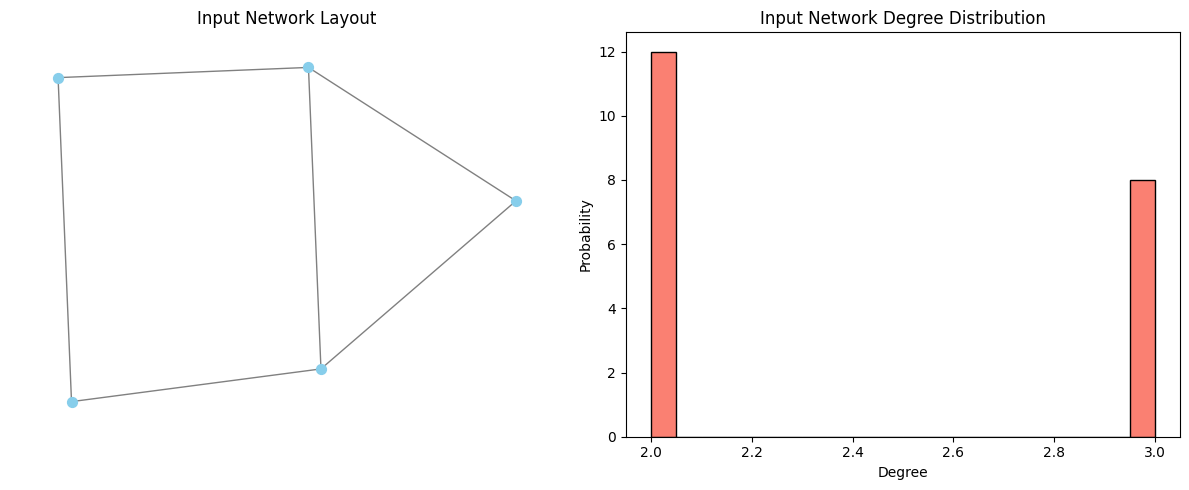


Metrics for Erdős-Rényi Graph:
Average Clustering Coefficient: 0.7667
Average Shortest Path Length: 1.3000
Average Degree: 2.8000


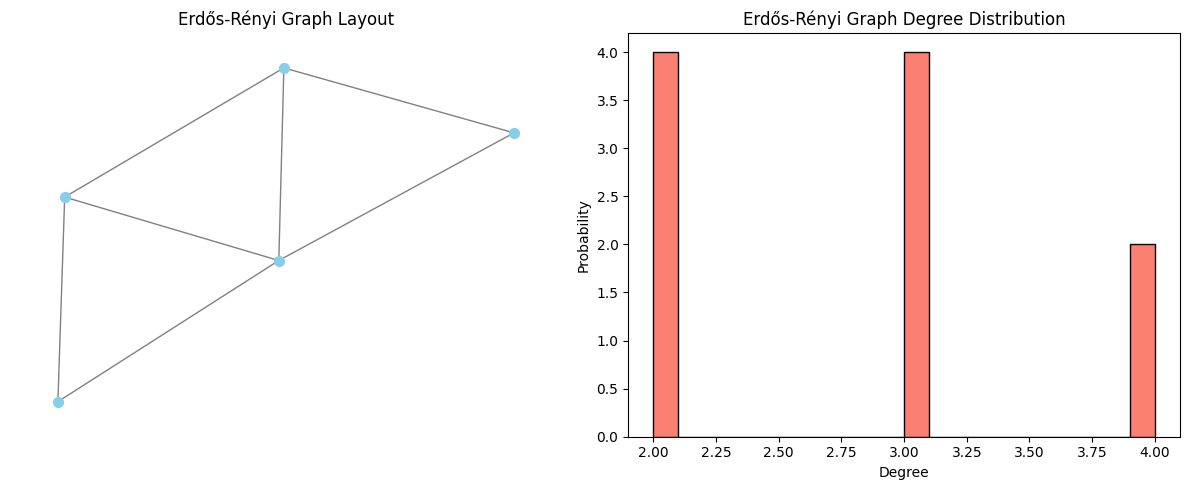


Metrics for Watts-Strogatz Graph:
Average Clustering Coefficient: 0.0000
Average Shortest Path Length: 1.5000
Average Degree: 2.0000


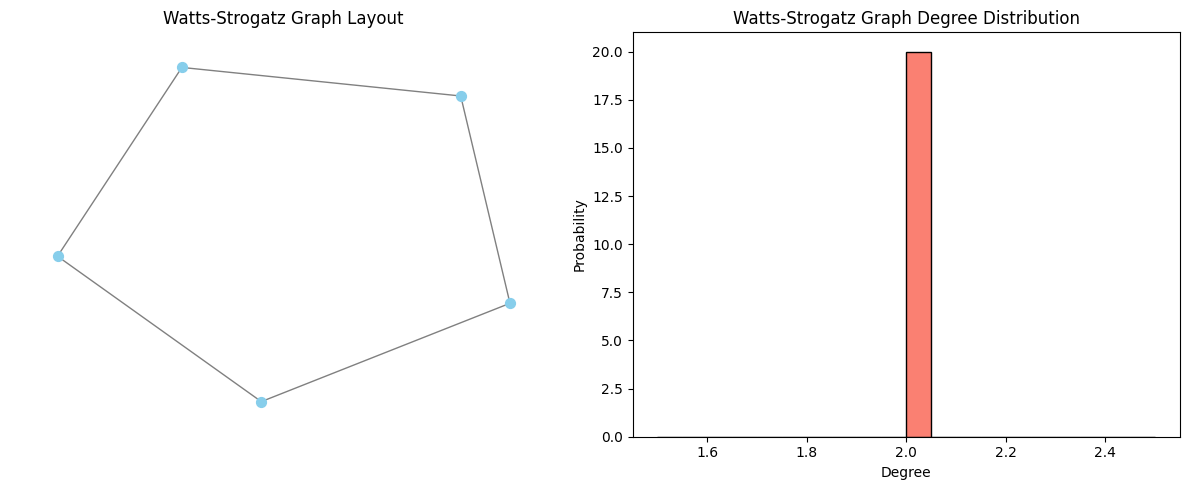


Metrics for Scale-Free Network:
Average Clustering Coefficient: 0.0000
Average Shortest Path Length: 1.6000
Average Degree: 1.6000


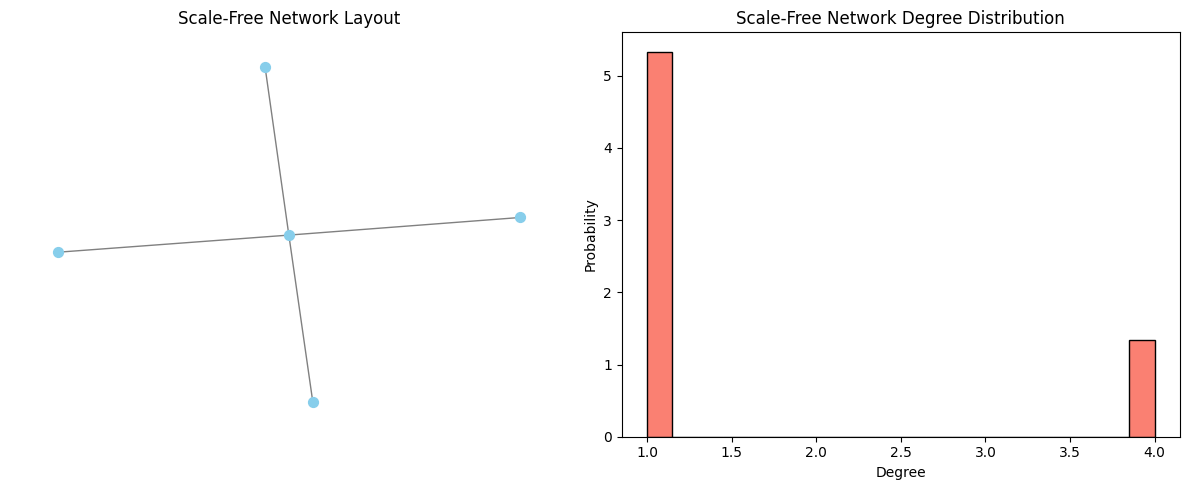

In [5]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to compute network metrics
def compute_metrics(G, name):
    # Average clustering coefficient
    avg_clustering = nx.average_clustering(G)
    
    # Average shortest path length (for the largest connected component)
    if nx.is_directed(G):
        G_cc = max(nx.strongly_connected_components(G), key=len)
        G_sub = G.subgraph(G_cc).copy()
    else:
        G_cc = max(nx.connected_components(G), key=len)
        G_sub = G.subgraph(G_cc).copy()
    avg_path_length = nx.average_shortest_path_length(G_sub)
    
    # Average degree
    degrees = [d for n, d in G.degree()]
    avg_degree = np.mean(degrees)
    
    print(f"\nMetrics for {name}:")
    print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
    print(f"Average Shortest Path Length: {avg_path_length:.4f}")
    print(f"Average Degree: {avg_degree:.4f}")
    return avg_clustering, avg_path_length, avg_degree, degrees

# Function to visualize network and degree distribution
def visualize_network(G, name, degrees):
    # Create figure with two subplots: network layout and degree distribution
    plt.figure(figsize=(12, 5))
    
    # Network layout (spring layout)
    plt.subplot(121)
    pos = nx.spring_layout(G, seed=42)  # Consistent layout for reproducibility
    nx.draw(G, pos, node_size=50, node_color='skyblue', edge_color='gray', with_labels=False)
    plt.title(f"{name} Layout")
    
    # Degree distribution histogram
    plt.subplot(122)
    plt.hist(degrees, bins=20, density=True, color='salmon', edgecolor='black')
    plt.title(f"{name} Degree Distribution")
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    
    plt.tight_layout()
    plt.show()

# Load the dataset from a GML file
try:
    G_data = nx.read_gml('network.gml')
    print("Loaded network from GML file")
    avg_clust, avg_path, avg_deg, degrees_data = compute_metrics(G_data, "Input Network")
    visualize_network(G_data, "Input Network", degrees_data)
except FileNotFoundError:
    print("GML file not found. Please provide a valid GML file path.")
    # Fallback: Create a sample graph for demonstration
    G_data = nx.karate_club_graph()
    print("Using Karate Club graph as fallback")
    avg_clust, avg_path, avg_deg, degrees_data = compute_metrics(G_data, "Karate Club Network")
    visualize_network(G_data, "Karate Club Network", degrees_data)

# Number of nodes for generated networks
n = G_data.number_of_nodes()
# Approximate number of edges for realistic comparisons
m = G_data.number_of_edges()
# Estimate edge probability for Erdős-Rényi
p = (2 * m) / (n * (n - 1)) if not nx.is_directed(G_data) else m / (n * (n - 1))

# 1. Erdős-Rényi Graph
G_er = nx.erdos_renyi_graph(n, p)
avg_clust_er, avg_path_er, avg_deg_er, degrees_er = compute_metrics(G_er, "Erdős-Rényi Graph")
visualize_network(G_er, "Erdős-Rényi Graph", degrees_er)

# 2. Watts-Strogatz Model
k = int(np.mean([d for n, d in G_data.degree()]))
G_ws = nx.watts_strogatz_graph(n, k, 0.1)
avg_clust_ws, avg_path_ws, avg_deg_ws, degrees_ws = compute_metrics(G_ws, "Watts-Strogatz Graph")
visualize_network(G_ws, "Watts-Strogatz Graph", degrees_ws)

# 3. Scale-Free Network (Barabási-Albert model)
m_ba = max(1, int(m / n)) # Ensure at least 1 edge
G_sf = nx.barabasi_albert_graph(n, m_ba)
avg_clust_sf, avg_path_sf, avg_deg_sf, degrees_sf = compute_metrics(G_sf, "Scale-Free Network")
visualize_network(G_sf, "Scale-Free Network", degrees_sf)


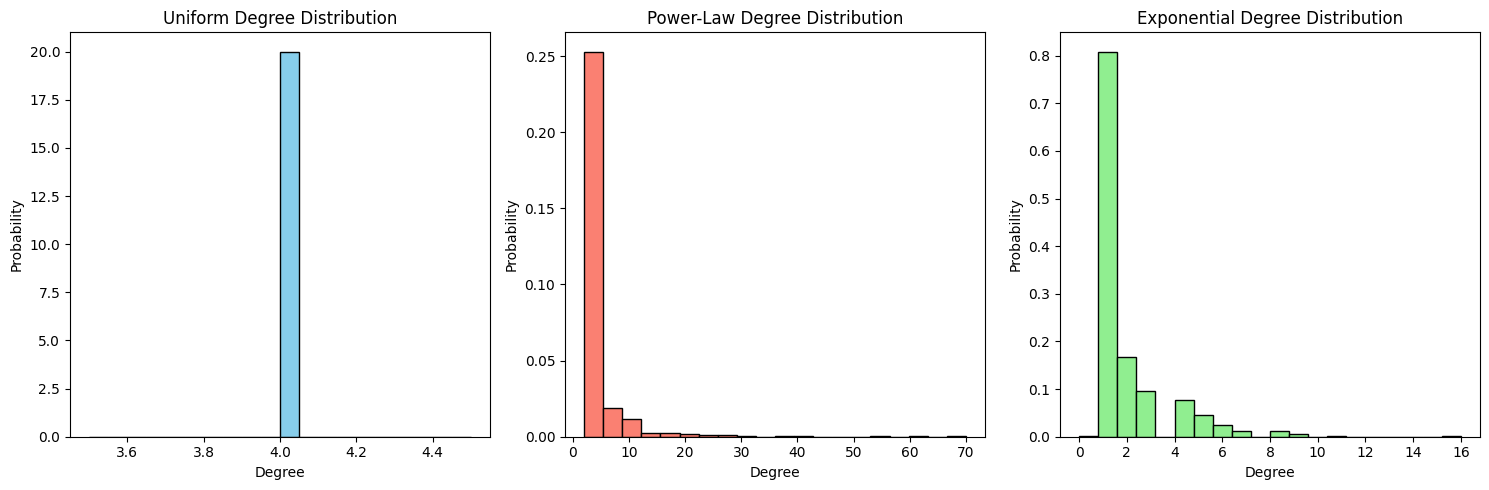


Metrics for Uniform Graph:
Average Degree: 4.0000

Metrics for Power-Law Graph:
Average Degree: 3.9920

Metrics for Exponential Graph:
Average Degree: 1.8940


In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 1000  # Number of nodes
k = 4     # Degree for uniform distribution (random regular graph)

# 1. Uniform Degree Distribution (Random Regular Graph)
G_uniform = nx.random_regular_graph(d=k, n=n)
degrees_uniform = [d for _, d in G_uniform.degree()]

# 2. Power-Law Degree Distribution (Barabási-Albert Model)
m = 2  # Number of edges to attach from new nodes
G_powerlaw = nx.barabasi_albert_graph(n, m)
degrees_powerlaw = [d for _, d in G_powerlaw.degree()]

# 3. Exponential Degree Distribution (Configuration Model)
# Generate degrees from an exponential distribution
scale = 2.0  # Scale parameter for exponential distribution
degrees_exp = np.random.exponential(scale=scale, size=n).astype(int)
degrees_exp = np.clip(degrees_exp, 1, max(degrees_exp))  # Ensure degrees >= 1
# Ensure sum of degrees is even for valid graph
if sum(degrees_exp) % 2 != 0:
    degrees_exp[0] += 1
try:
    G_exponential = nx.configuration_model(degrees_exp, seed=42)
    # Remove self-loops and parallel edges
    G_exponential = nx.Graph(G_exponential)
    G_exponential.remove_edges_from(nx.selfloop_edges(G_exponential))
    degrees_exponential = [d for _, d in G_exponential.degree()]
except:
    print("Failed to create exponential graph due to degree sequence constraints.")
    degrees_exponential = degrees_exp  # Fallback to sampled degrees

# Plotting the degree distributions
plt.figure(figsize=(15, 5))

# Uniform
plt.subplot(131)
plt.hist(degrees_uniform, bins=20, density=True, color='skyblue', edgecolor='black')
plt.title('Uniform Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')

# Power-Law
plt.subplot(132)
plt.hist(degrees_powerlaw, bins=20, density=True, color='salmon', edgecolor='black')
plt.title('Power-Law Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')

# Exponential
plt.subplot(133)
plt.hist(degrees_exponential, bins=20, density=True, color='lightgreen', edgecolor='black')
plt.title('Exponential Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

# Compute and print basic metrics for verification
def print_metrics(G, name):
    avg_degree = np.mean([d for _, d in G.degree()])
    print(f"\nMetrics for {name}:")
    print(f"Average Degree: {avg_degree:.4f}")

print_metrics(G_uniform, "Uniform Graph")
print_metrics(G_powerlaw, "Power-Law Graph")
print_metrics(G_exponential, "Exponential Graph")



Metrics for Erdős-Rényi (⟐k⟐ = 0.8):
Average Clustering Coefficient: 0.0000
Average Shortest Path Length: 4.3235
Average Degree: 0.7880


C:\Users\BHARATHI SHANKAR\AppData\Local\Temp\ipykernel_17396\2113304345.py:37: UserWarning: Glyph 10192 (\N{WHITE DIAMOND WITH CENTRED DOT}) missing from current font.
  plt.tight_layout()


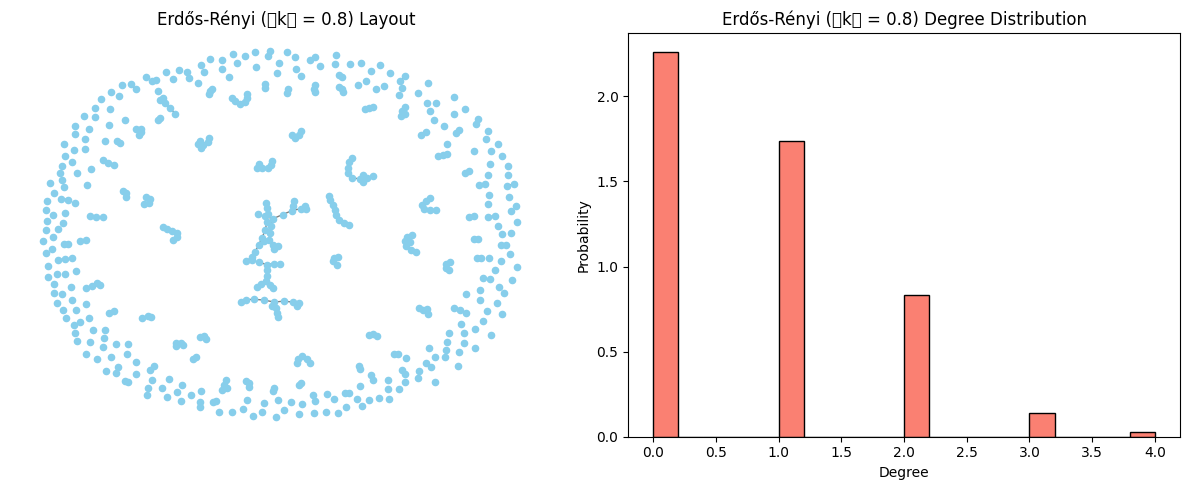


Metrics for Erdős-Rényi (⟐k⟐ = 1):
Average Clustering Coefficient: 0.0000
Average Shortest Path Length: 6.4053
Average Degree: 0.9560


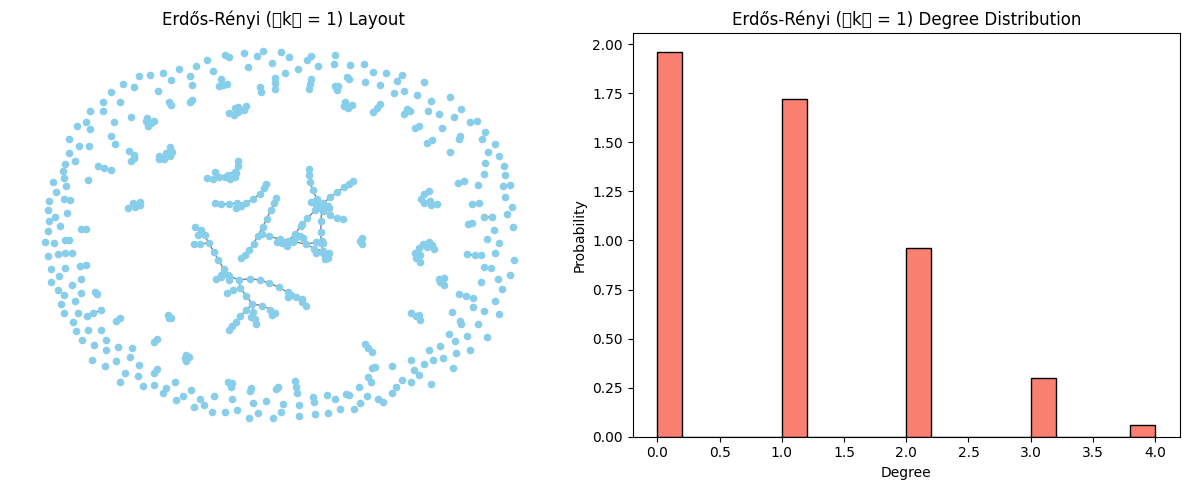


Metrics for Erdős-Rényi (⟐k⟐ = 8):
Average Clustering Coefficient: 0.0131
Average Shortest Path Length: 3.2530
Average Degree: 7.8360


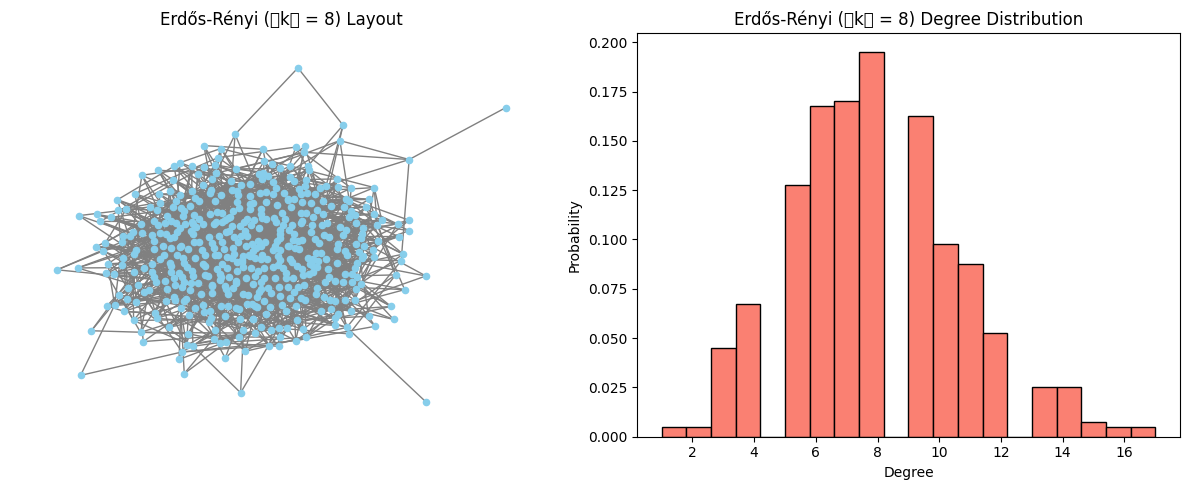


Circle Network (N=20, m=2):
Average Clustering Coefficient: 0.5000
Average Shortest Path Length (approx): 2.5000
Average Degree: 4.0000
For large N: 〈C〉 → 0.5000, 〈d〉 ∝ N / (4m)

Cayley Tree (k=3, P=5, N=94):
Nodes at distance 0: 1
Nodes at distance 1: 3
Nodes at distance 2: 6
Nodes at distance 3: 12
Nodes at distance 4: 24
Nodes at distance 5: 48
Degree Distribution: 48 nodes with degree 1, 45 nodes with degree 3, 1 node with degree 3
Diameter: 10
Diameter in terms of N: ≈ 2 * ceil(log((N * (k-2) + k-1)/k) / log(k-1)) = 10
Small-world property: Yes (〈d〉 ∝ log(N))

Metrics for Snobbish Network (p=0.1, q=0.01):
Average Clustering Coefficient: 0.0844
Average Shortest Path Length: 2.5387
Average Degree: 11.1900
Analytical Average Degree (Blue Subnetwork): 9.9000
Analytical Average Degree (Full Network): 10.9000
Minimal p or q for one component: > 0.0050
Small-world property: Yes (if p or q > 0.0050, 〈d〉 ∝ log(N))

Snobbish Social Network (N=100, f=0.1, p=0.05):
Average Purple Neighbors p

In [8]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Set random seed for reproducibility
np.random.seed(42)

# Function to compute and print network metrics
def compute_metrics(G, name):
    avg_clustering = nx.average_clustering(G)
    G_cc = max(nx.connected_components(G), key=len) if not nx.is_directed(G) else max(nx.strongly_connected_components(G), key=len)
    G_sub = G.subgraph(G_cc).copy()
    avg_path_length = nx.average_shortest_path_length(G_sub) if G_sub.number_of_nodes() > 1 else 0
    degrees = [d for n, d in G.degree()]
    avg_degree = np.mean(degrees)
    print(f"\nMetrics for {name}:")
    print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
    print(f"Average Shortest Path Length: {avg_path_length:.4f}")
    print(f"Average Degree: {avg_degree:.4f}")
    return avg_clustering, avg_path_length, avg_degree, degrees

# Function to visualize network and degree distribution
def visualize_network(G, name, degrees):
    plt.figure(figsize=(12, 5))
    # Network layout
    plt.subplot(121)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=20, node_color='skyblue', edge_color='gray', with_labels=False)
    plt.title(f"{name} Layout")
    # Degree distribution
    plt.subplot(122)
    plt.hist(degrees, bins=20, density=True, color='salmon', edgecolor='black')
    plt.title(f"{name} Degree Distribution")
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()

# 1. Erdős-Rényi Networks
N = 500
avg_degrees = [0.8, 1, 8]
for avg_k in avg_degrees:
    p = avg_k / (N - 1)  # Probability for G(N, p) model
    G_er = nx.erdos_renyi_graph(N, p, seed=42)
    avg_clust, avg_path, avg_deg, degrees = compute_metrics(G_er, f"Erdős-Rényi (⟐k⟐ = {avg_k})")
    visualize_network(G_er, f"Erdős-Rényi (⟐k⟐ = {avg_k})", degrees)

# 2. Circle Network
def circle_network_metrics(N, m):
    G_circle = nx.circulant_graph(N, list(range(1, m + 1)))
    if m > 1:
        avg_clustering = 3 * (m - 1) / (2 * (2 * m - 1))
    else:
        avg_clustering = 0
    avg_path_length = N / (4 * m) if N > 2 * m else nx.average_shortest_path_length(G_circle)
    avg_degree = 2 * m
    print(f"\nCircle Network (N={N}, m={m}):")
    print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
    print(f"Average Shortest Path Length (approx): {avg_path_length:.4f}")
    print(f"Average Degree: {avg_degree:.4f}")
    print(f"For large N: 〈C〉 → {3 * (m - 1) / (2 * (2 * m - 1)):.4f}, 〈d〉 ∝ N / (4m)")

# Example: N=20, m=2
circle_network_metrics(20, 2)

# 3. Cayley Tree
def cayley_tree_metrics(k, P):
    def nodes_at_distance_t(t):
        if t == 0:
            return 1
        return k * (k - 1) ** (t - 1)
    
    N = 1 + k * ((k - 1) ** P - 1) // (k - 2) if k > 2 else 1 + k * P
    print(f"\nCayley Tree (k={k}, P={P}, N={N}):")
    
    for t in range(P + 1):
        print(f"Nodes at distance {t}: {nodes_at_distance_t(t)}")
    
    leaves = (k * (k - 1) ** (P - 1)) if P > 0 else 0
    internal = N - leaves - 1 if P > 0 else 0
    print(f"Degree Distribution: {leaves} nodes with degree 1, {internal} nodes with degree {k}, 1 node with degree {k}")
    
    dmax = 2 * P
    print(f"Diameter: {dmax}")
    
    if k > 2:
        dmax_N = 2 * np.ceil(np.log((N * (k - 2) + k - 1) / k) / np.log(k - 1)).astype(int)
        print(f"Diameter in terms of N: ≈ 2 * ceil(log((N * (k-2) + k-1)/k) / log(k-1)) = {dmax_N}")
    
    avg_path_length = np.log(N) / np.log(k - 1) if k > 2 else P / 2
    print(f"Small-world property: {'Yes' if k > 2 else 'No'} (〈d〉 ∝ {'log(N)' if k > 2 else 'N'})")

# Example: k=3, P=5
cayley_tree_metrics(3, 5)

# 4. Snobbish Network
def snobbish_network_metrics(N, p, q):
    G_snobbish = nx.Graph()
    nodes_red = range(N)
    nodes_blue = range(N, 2 * N)
    G_snobbish.add_nodes_from(nodes_red, color='red')
    G_snobbish.add_nodes_from(nodes_blue, color='blue')
    
    for i in range(2 * N):
        for j in range(i + 1, 2 * N):
            if G_snobbish.nodes[i]['color'] == G_snobbish.nodes[j]['color']:
                if np.random.random() < p:
                    G_snobbish.add_edge(i, j)
            else:
                if np.random.random() < q:
                    G_snobbish.add_edge(i, j)
    
    blue_subgraph = G_snobbish.subgraph(nodes_blue)
    blue_degrees = [d for n, d in blue_subgraph.degree()]
    avg_degree_blue = np.mean(blue_degrees) if blue_degrees else 0
    avg_clust, avg_path, avg_degree, degrees = compute_metrics(G_snobbish, f"Snobbish Network (p={p}, q={q})")
    
    avg_degree_blue_analytical = (N - 1) * p
    avg_degree_full_analytical = (N - 1) * p + N * q
    print(f"Analytical Average Degree (Blue Subnetwork): {avg_degree_blue_analytical:.4f}")
    print(f"Analytical Average Degree (Full Network): {avg_degree_full_analytical:.4f}")
    
    min_pq = 1 / (2 * N - 1)
    print(f"Minimal p or q for one component: > {min_pq:.4f}")
    print(f"Small-world property: Yes (if p or q > {min_pq:.4f}, 〈d〉 ∝ log(N))")

# Example: N=100, p=0.1, q=0.01
snobbish_network_metrics(100, 0.1, 0.01)

# 5. Snobbish Social Networks (Fixed)
def snobbish_social_networks(N, f, p):
    total_nodes = 2 * N
    num_purple = int(f * total_nodes)
    num_red_blue = total_nodes - num_purple
    N_each = num_red_blue // 2
    total_nodes_with_purple = 2 * N_each + num_purple
    G_social = nx.Graph()
    nodes_red = range(N_each)
    nodes_blue = range(N_each, 2 * N_each)
    nodes_purple = range(2 * N_each, 2 * N_each + num_purple)
    G_social.add_nodes_from(nodes_red, color='red')
    G_social.add_nodes_from(nodes_blue, color='blue')
    G_social.add_nodes_from(nodes_purple, color='purple')
    
    # Add edges with correct node range
    for i in range(total_nodes_with_purple):
        for j in range(i + 1, total_nodes_with_purple):
            if G_social.nodes[i]['color'] == 'purple' or G_social.nodes[j]['color'] == 'purple':
                if np.random.random() < p:
                    G_social.add_edge(i, j)
            elif G_social.nodes[i]['color'] == G_social.nodes[j]['color']:
                if np.random.random() < p:
                    G_social.add_edge(i, j)
    
    purple_neighbors_red = sum(1 for i in nodes_red for j in G_social.neighbors(i) if G_social.nodes[j]['color'] == 'purple')
    avg_purple_neighbors = purple_neighbors_red / N_each if N_each > 0 else 0
    f_required = 2 / (p * total_nodes)
    print(f"\nSnobbish Social Network (N={N}, f={f}, p={p}):")
    print(f"Average Purple Neighbors per Red Node: {avg_purple_neighbors:.4f}")
    print(f"Required f for interactivity (approx): {f_required:.4f}")
    
    avg_degree_red = (N_each - 1) * p + num_purple * p
    print(f"Average Degree of Red Nodes: {avg_degree_red:.4f}")
    print(f"For large ⟨k⟩ (p≫0), f_required ∝ 1/(p*2N) → small f")
    print("Implications: A small fraction of purple nodes can bridge segregated red and blue communities, modeling social networks where connectors (e.g., influencers) integrate groups.")

# Example: N=100, f=0.1, p=0.05
snobbish_social_networks(100, 0.1, 0.05)



Generating networks for γ=2.2

Scale-Free Network (N=1000, γ=2.2):
Percentage of Multi-links and Self-loops: 28.0288%
Self-loops: 115, Multi-links: 468

Scale-Free Network (N=10000, γ=2.2):
Percentage of Multi-links and Self-loops: 5.0417%
Self-loops: 54, Multi-links: 937

Scale-Free Network (N=100000, γ=2.2):
Percentage of Multi-links and Self-loops: 7.6339%
Self-loops: 563, Multi-links: 17516

Scale-Free Network (N=100, γ=2.2):
Percentage of Multi-links and Self-loops: 12.1951%
Self-loops: 4, Multi-links: 11

Scale-Free Network (N=500, γ=2.2):
Percentage of Multi-links and Self-loops: 20.1810%
Self-loops: 20, Multi-links: 203

Scale-Free Network (N=5000, γ=2.2):
Percentage of Multi-links and Self-loops: 16.8980%
Self-loops: 134, Multi-links: 1850

Scale-Free Network (N=50000, γ=2.2):
Percentage of Multi-links and Self-loops: 9.6787%
Self-loops: 507, Multi-links: 11237

Generating networks for γ=3.0

Scale-Free Network (N=1000, γ=3.0):
Percentage of Multi-links and Self-loops: 0.1248

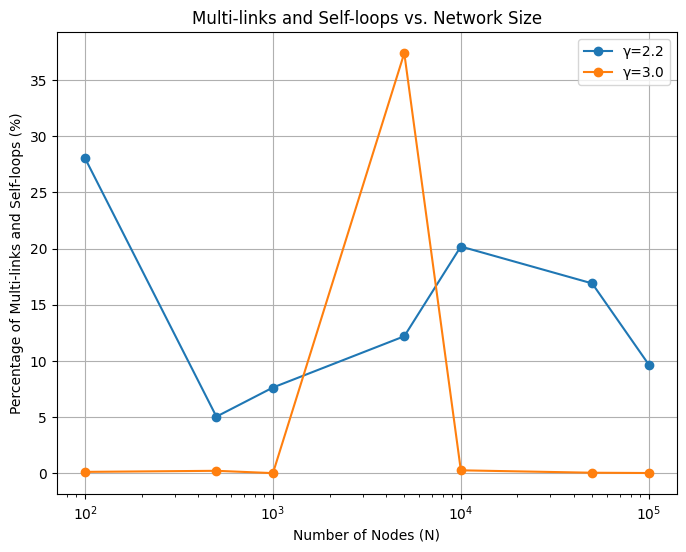

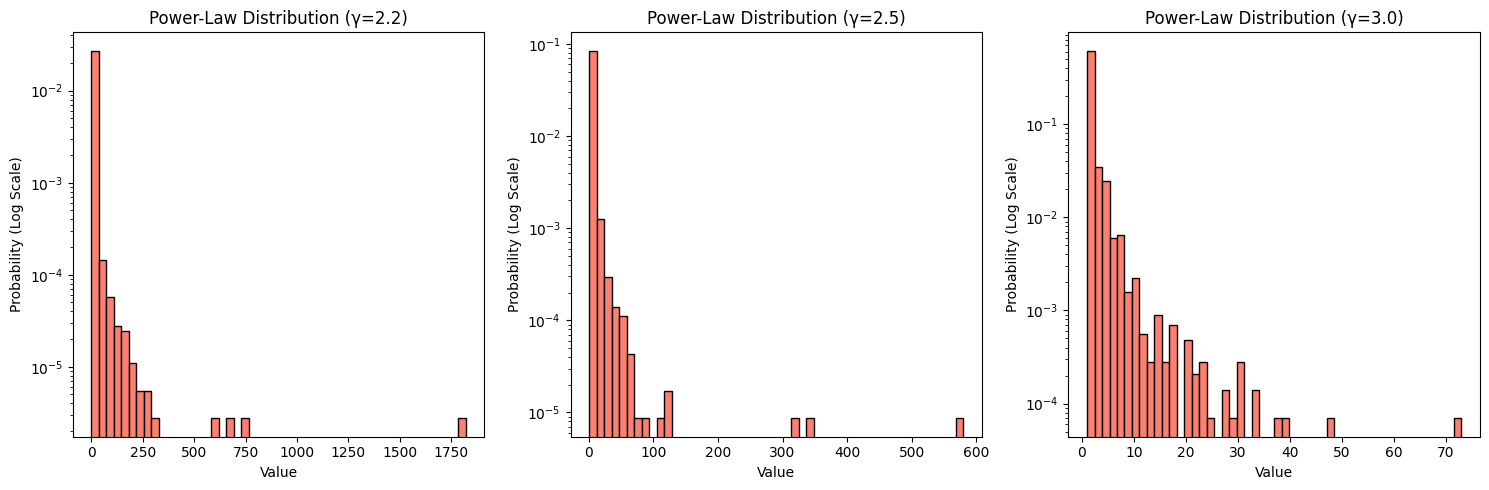

In [9]:
#Scale Free Networks Progamming Questions from BOOk

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate power-law degree sequence
def generate_power_law_degrees(N, gamma, k_min=1):
    # Generate degrees from power-law distribution using inverse CDF
    u = np.random.uniform(0, 1, N)
    degrees = np.floor(k_min * (1 - u) ** (-1 / (gamma - 1))).astype(int)
    # Ensure minimum degree and even sum
    degrees = np.maximum(degrees, k_min)
    if sum(degrees) % 2 != 0:
        degrees[0] += 1
    return degrees

# Function to compute multi-links and self-loops percentage
def compute_multilinks_selfloops(G):
    total_edges = G.number_of_edges()
    self_loops = len(list(nx.selfloop_edges(G)))
    # Count multi-links by comparing multigraph to simple graph
    G_simple = nx.Graph(G)  # Removes multi-links and self-loops
    multi_edges = total_edges - G_simple.number_of_edges()
    total_special_edges = self_loops + multi_edges
    percentage = (total_special_edges / total_edges * 100) if total_edges > 0 else 0
    return percentage, self_loops, multi_edges

# Function to generate and analyze scale-free network
def analyze_scale_free_network(N, gamma):
    # Generate degree sequence
    degrees = generate_power_law_degrees(N, gamma)
    # Create configuration model
    try:
        G = nx.configuration_model(degrees, seed=42)
        percentage, self_loops, multi_edges = compute_multilinks_selfloops(G)
        print(f"\nScale-Free Network (N={N}, γ={gamma}):")
        print(f"Percentage of Multi-links and Self-loops: {percentage:.4f}%")
        print(f"Self-loops: {self_loops}, Multi-links: {multi_edges}")
        return percentage
    except nx.NetworkXError:
        print(f"Failed to create network for N={N}, γ={gamma} due to degree sequence constraints.")
        return 0

# Part 1: Generate Scale-Free Networks
Ns = [1000, 10000, 100000]
gammas = [2.2, 3.0]
percentages = {gamma: [] for gamma in gammas}
N_values = [100, 500, 1000, 5000, 10000, 50000, 100000]  # For plotting

for gamma in gammas:
    print(f"\nGenerating networks for γ={gamma}")
    for N in Ns:
        percentage = analyze_scale_free_network(N, gamma)
        if N in N_values:
            percentages[gamma].append(percentage)
    # Generate additional networks for plotting
    for N in N_values:
        if N not in Ns:
            percentage = analyze_scale_free_network(N, gamma)
            percentages[gamma].append(percentage)

# Plot percentages vs N
plt.figure(figsize=(8, 6))
for gamma in gammas:
    plt.plot(N_values, percentages[gamma], marker='o', label=f'γ={gamma}')
plt.xscale('log')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Percentage of Multi-links and Self-loops (%)')
plt.title('Multi-links and Self-loops vs. Network Size')
plt.legend()
plt.grid(True)
plt.show()

# Part 2: Mastering Distributions
def generate_power_law_dataset(size, gamma, k_min=1):
    u = np.random.uniform(0, 1, size)
    data = np.floor(k_min * (1 - u) ** (-1 / (gamma - 1))).astype(int)
    return np.maximum(data, k_min)

# Generate datasets
size = 10000
gammas_dist = [2.2, 2.5, 3.0]
datasets = {gamma: generate_power_law_dataset(size, gamma) for gamma in gammas_dist}

# Plot histograms
plt.figure(figsize=(15, 5))
for i, gamma in enumerate(gammas_dist, 1):
    plt.subplot(1, 3, i)
    plt.hist(datasets[gamma], bins=50, density=True, log=True, color='salmon', edgecolor='black')
    plt.title(f'Power-Law Distribution (γ={gamma})')
    plt.xlabel('Value')
    plt.ylabel('Probability (Log Scale)')
plt.tight_layout()
plt.show()
